In [31]:
import pandas as pd
import numpy as np
import csv
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Class Task (using the employe data)

1)Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

2)Plot bar charts showing impact of employee salaries on retention

3)Plot bar charts showing corelation between department and employee retention

4)Now build logistic regression model using variables that were narrowed down in step 1

5)Measure the accuracy of the model

In [32]:
employee = pd.read_csv('/content/drive/MyDrive/WTF-Material_Class B/HR_comma_sep 1.csv')
employee.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [33]:
employee.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [34]:
employee.shape

(14999, 10)

In [35]:
employee.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [36]:
employee.duplicated().sum()

np.int64(3008)

In [37]:
employee.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
left,int64
promotion_last_5years,int64
Department,object
salary,object


In [38]:
employee["salary"].value_counts()

,count
salary,
low,7316
medium,6446
high,1237


In [39]:
employee["left"].value_counts()

,count
left,
0,11428
1,3571


In [40]:
employee["Department"].value_counts()

,count
Department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [41]:
employee["satisfaction_level"].value_counts()

,count
satisfaction_level,
0.10,358
0.11,335
0.74,257
0.77,252
0.84,247
...,...
0.25,34
0.28,31
0.27,30


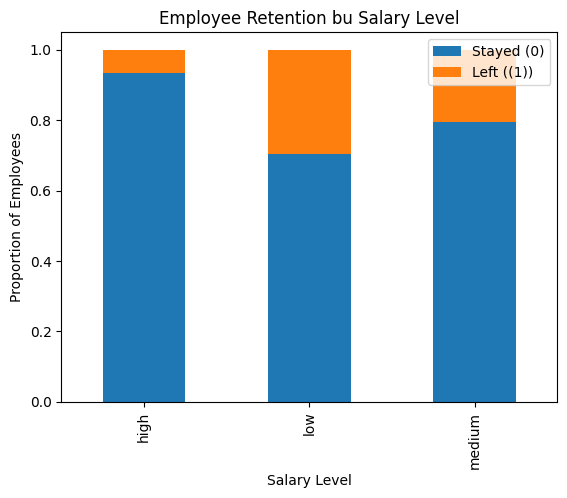

In [42]:
salary_retention = pd.crosstab(employee["salary"], employee["left"], normalize="index")

salary_retention.plot(kind="bar", stacked=True)

plt.xlabel("Salary Level")
plt.ylabel("Proportion of Employees")
plt.title("Employee Retention bu Salary Level")
plt.legend(["Stayed (0)", "Left ((1))"])
plt.show()

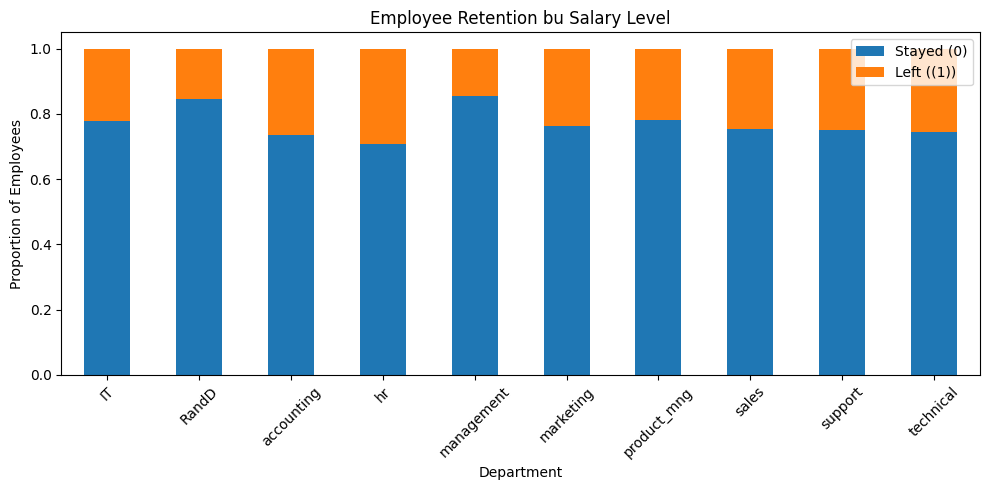

In [43]:
dept_retention = pd.crosstab(employee["Department"], employee["left"], normalize="index")

dept_retention.plot(kind="bar", stacked=True, figsize=(10,5))

plt.xlabel("Department")
plt.ylabel("Proportion of Employees")
plt.title("Employee Retention bu Salary Level")
plt.legend(["Stayed (0)", "Left ((1))"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

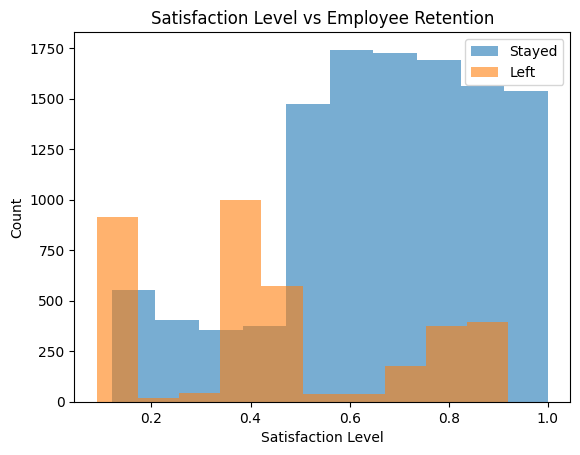

In [44]:
plt.hist(employee[employee['left']==0]['satisfaction_level'], alpha=0.6, label='Stayed')
plt.hist(employee[employee['left']==1]['satisfaction_level'], alpha=0.6, label='Left')

plt.legend()
plt.title('Satisfaction Level vs Employee Retention')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()


In [45]:
X = employee[['satisfaction_level',
        'number_project',
        'average_montly_hours',
        'time_spend_company',
        'promotion_last_5years',
        'salary']]

y = employee['left']


In [46]:
X = pd.get_dummies(X, columns=['salary'], drop_first=True)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(       satisfaction_level  number_project  average_montly_hours  \
 9838                 1.00               3                   188   
 7689                 0.16               4                   196   
 6557                 0.80               3                   175   
 6872                 0.66               4                   112   
 820                  0.11               7                   284   
 ...                   ...             ...                   ...   
 5191                 0.52               4                   246   
 13418                0.49               4                   233   
 5390                 0.66               5                   249   
 860                  0.79               4                   218   
 7270                 0.98               2                   219   
 
        time_spend_company  promotion_last_5years  salary_low  salary_medium  
 9838                    4                      0        True          False  
 7689                   

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_pred = model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.759


In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2105  189]
 [ 534  172]]


In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2294
           1       0.48      0.24      0.32       706

    accuracy                           0.76      3000
   macro avg       0.64      0.58      0.59      3000
weighted avg       0.72      0.76      0.73      3000



In [56]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

coefficients.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
5,salary_low,0.997487
6,salary_medium,0.744600
3,time_spend_company,0.363896
2,average_montly_hours,0.275822
4,promotion_last_5years,-0.230115
1,number_project,-0.345747
0,satisfaction_level,-1.019465
